## Immanuella Duke
## Final project SCAMP

### Used car dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

-----------------------------------------------------------------------------------

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import gc
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Download dataset from Kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

100% 262M/262M [00:03<00:00, 87.1MB/s]
100% 262M/262M [00:03<00:00, 82.1MB/s]


In [5]:
!ls
!unzip \*.zip  && rm *.zip

craigslist-carstrucks-data.zip	kaggle.json  vehicles.csv
Archive:  craigslist-carstrucks-data.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Import dataset

In [6]:
#Import dataset
import csv
vehicles_df = pd.read_csv('vehicles.csv')

In [7]:
vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## DATA CLEANING

In [8]:
#drop columns that won't be used - id, url, region-url, county

In [9]:
vehicles_df = vehicles_df.drop(['id', 'url', 'region_url','county'], axis=1)

In [10]:
pd.set_option('display.max_columns', 500)

In [11]:
# drop rows with more than 19/22 columns missing.

In [12]:
vehicles_df = vehicles_df[vehicles_df.isnull().sum(axis=1) < 19]

In [13]:
#check for null columns
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426812 entries, 27 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426812 non-null  object 
 1   price         426812 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  image_url     426812 non-null  object 
 17  description   426810 non-null  object 
 18  sta

In [14]:
vehicles_df.isnull().sum() #look at each column that is useful but has many null values.
#There are no null region values. we will use that as a base for cleaning and replacing missing/wrong odometer and 0 price readings.

region               0
price                0
year              1137
manufacturer     17578
model             5209
condition       174036
cylinders       177610
fuel              2945
odometer          4332
title_status      8174
transmission      2488
VIN             160974
drive           130499
size            306293
type             92790
paint_color     130135
image_url            0
description          2
state                0
lat               6481
long              6481
posting_date         0
dtype: int64

In [15]:
vehicles_df.describe(include = 'all')  #see the composition of each column


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
count,426812,4.268120e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,426812,420331.000000,420331.000000,426812
unique,404,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,241899,360911,51,NaN,NaN,381536
top,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,50610,NaN,NaN,12
mean,NaN,7.520927e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,NaN,1.218325e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,NaN,2.648900e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


Drop VIN, description,image URL, lat, long, posting date columns

In [16]:
vehicles_df.drop(['VIN', 'image_url', 'lat', 'long', 'posting_date'],axis=1, inplace=True)

In [17]:
vehicles_df.shape

(426812, 17)

In [18]:
vehicles_df.columns   #check remaining columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state'],
      dtype='object')

###  Clean explanatory variables.



---





**Odometer column**: From the describe table above, we see odometer readings that are 0. This shouldn't be the case so we need to deal with those. There are no negative values so no need to cover those.


In [19]:
min(vehicles_df.odometer)

0.0

In [20]:
#This is a sample of a random value that might have been entered into a record
if 111 in vehicles_df.odometer:
  print(True)

True


In [21]:
#replace Nan with 0 so we can clean in the same way as error values
vehicles_df['odometer'] = vehicles_df['odometer'].fillna(0)

In [22]:
#These are some error values that have been seen in the past
odometer_error_value_list = [0,111,1111,11111,111111,123,1234,12345,123456] #change list based on output of the cell below

In [23]:
for i in odometer_error_value_list:
  if i in vehicles_df.odometer:
    print(i, True)

111 True
1111 True
11111 True
111111 True
123 True
1234 True
12345 True
123456 True


In [24]:
vehicles_df.loc[(vehicles_df.odometer == 0) & (vehicles_df.region == 'birmingham')].shape #where odometer is 0 and birmingham

(23, 17)

In [25]:

gc.collect()

11

In [26]:
#function to the clean the odometer column
def clean_odometer(odometer_error_value_list, region):
  region_df = vehicles_df[vehicles_df.region == region]
  for error_val in odometer_error_value_list:
    #find the median odometer reading for all those error-free dataframes
    median_odometer_reading = np.median(region_df.loc[(region_df['odometer'] != error_val)].odometer)
    #find this particular row in the larger df, with this region and odometer error
    vehicles_df.loc[((vehicles_df['odometer'] == error_val)) & ((vehicles_df['region'] == region)) , 'odometer'] = median_odometer_reading
    


In [27]:
#call method on all 404 regions to clean the odometer column
regions = list(vehicles_df.region.unique())
for region in regions:
  print("Starting to clean", region)
  clean_odometer(odometer_error_value_list, region)
  print("Finished cleaning", region)
  print("---")

Starting to clean auburn
Finished cleaning auburn
---
Starting to clean birmingham
Finished cleaning birmingham
---
Starting to clean dothan
Finished cleaning dothan
---
Starting to clean florence / muscle shoals
Finished cleaning florence / muscle shoals
---
Starting to clean gadsden-anniston
Finished cleaning gadsden-anniston
---
Starting to clean huntsville / decatur
Finished cleaning huntsville / decatur
---
Starting to clean mobile
Finished cleaning mobile
---
Starting to clean montgomery
Finished cleaning montgomery
---
Starting to clean tuscaloosa
Finished cleaning tuscaloosa
---
Starting to clean anchorage / mat-su
Finished cleaning anchorage / mat-su
---
Starting to clean fairbanks
Finished cleaning fairbanks
---
Starting to clean kenai peninsula
Finished cleaning kenai peninsula
---
Starting to clean southeast alaska
Finished cleaning southeast alaska
---
Starting to clean flagstaff / sedona
Finished cleaning flagstaff / sedona
---
Starting to clean mohave county
Finished cle

In [28]:
vehicles_df.loc[(vehicles_df.odometer == 0) & (vehicles_df.region == 'birmingham')].shape #where odometer is 0 and birmingham after call. the shape is 0,22, showing that it doesn't exist

#shape was 0 after cleaning occured, as expected

(0, 17)

*Odometer column successfully cleaned for **all** regions - No Nan values too. 

---

**Year column**: No need to clean this because the lowest and max and normal data values as well are valid.
Also the type of the column is integer so there are no floating point values present. The data is valid.

In [29]:
vehicles_df.year.value_counts()

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1902.0        1
1915.0        1
1905.0        1
1909.0        1
1918.0        1
Name: year, Length: 114, dtype: int64

---

### **Clean the price column (target variable)**
Because price column is the target variable, great care is taken in cleaning 
this column, in this step, we only tweak the prices of the cars that are 0.
This value will be changed based on **similar cars**

In [30]:
#function to the clean the price column
def clean_price(error_val, region):
  region_df = vehicles_df[vehicles_df.region == region]
  #find the median odometer reading for all those error-free dataframes
  median_price_reading = np.median(region_df.loc[(region_df['price'] != error_val)].price)
  #find this particular row in the larger df, with this region and price error
  vehicles_df.loc[((vehicles_df['price'] == error_val)) & ((vehicles_df['region'] == region)) , 'price'] = median_price_reading


In [31]:
#call method on all 404 regions to clean the price column
regions = list(vehicles_df.region.unique())
for region in regions:
  print("Starting to clean", region)
  clean_price(0, region)
  print("Finished cleaning", region)
  print("---")

Starting to clean auburn
Finished cleaning auburn
---
Starting to clean birmingham
Finished cleaning birmingham
---
Starting to clean dothan
Finished cleaning dothan
---
Starting to clean florence / muscle shoals
Finished cleaning florence / muscle shoals
---
Starting to clean gadsden-anniston
Finished cleaning gadsden-anniston
---
Starting to clean huntsville / decatur
Finished cleaning huntsville / decatur
---
Starting to clean mobile
Finished cleaning mobile
---
Starting to clean montgomery
Finished cleaning montgomery
---
Starting to clean tuscaloosa
Finished cleaning tuscaloosa
---
Starting to clean anchorage / mat-su
Finished cleaning anchorage / mat-su
---
Starting to clean fairbanks
Finished cleaning fairbanks
---
Starting to clean kenai peninsula
Finished cleaning kenai peninsula
---
Starting to clean southeast alaska
Finished cleaning southeast alaska
---
Starting to clean flagstaff / sedona
Finished cleaning flagstaff / sedona
---
Starting to clean mohave county
Finished cle

At the end of the cleaning, of the price, there are no more 0 error values as those seen in the error list.

In [32]:
min(vehicles_df.price) #no 0 price value

1.0

### Use the description column to fill missing in these columns:
*   drive
*   type
*   paint_color
*   fuel
*   title status





In [33]:
gc.collect()

115

In [34]:
#make all the words in the description column lower case for each comparison
vehicles_df['new_description'] = vehicles_df.description.astype(str).apply(lambda x: x.lower())

In [35]:
vehicles_df['new_description'] 

27        carvana is the safer way to buy a car during t...
28        carvana is the safer way to buy a car during t...
29        carvana is the safer way to buy a car during t...
30        carvana is the safer way to buy a car during t...
31        2013 f-150 xlt v6 4 door. good condition. leve...
                                ...                        
426875    carvana is the safer way to buy a car during t...
426876    carvana is the safer way to buy a car during t...
426877    carvana is the safer way to buy a car during t...
426878    carvana is the safer way to buy a car during t...
426879    carvana is the safer way to buy a car during t...
Name: new_description, Length: 426812, dtype: object

---
**Drive column**

In [36]:
vehicles_df.drive.value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [37]:
gc.collect()

200

In [38]:
vehicles_df['new_drive'] = vehicles_df.new_description.str.findall('(4wd|fwd|rwd)')
vehicles_df['new_drive'] = vehicles_df['new_drive'].apply(', '.join)

#if drive is NAN, replace with the value in 'new_drive'
vehicles_df.loc[vehicles_df['drive'].isnull(), 'drive'] =  vehicles_df['new_drive']

---
**Type column**: 

In [39]:
type = vehicles_df.groupby('type')['type'].count()
type

type
SUV            77284
bus              517
convertible     7731
coupe          19204
hatchback      16598
mini-van        4825
offroad          609
other          22110
pickup         43510
sedan          87056
truck          35279
van             8548
wagon          10751
Name: type, dtype: int64

In [40]:
vehicles_df['new_type'] = vehicles_df.new_description.str.findall('(suv|bus|convertible|coupe|hatchback|mini-van|offroad|pickup|sedan|truck|van|wagon)')
vehicles_df['new_type'] = vehicles_df['new_type'].apply(', '.join)
vehicles_df.loc[vehicles_df['type'].isnull(), 'type'] =  vehicles_df['new_type']

#successfully replaced the null values in type with those found in the description

---
**Paint_color column**


In [41]:
paint_color = vehicles_df.groupby('paint_color')['paint_color'].count()
paint_color

paint_color
black     62861
blue      31223
brown      6593
custom     6700
green      7343
grey      24416
orange     1984
purple      687
red       30473
silver    42970
white     79285
yellow     2142
Name: paint_color, dtype: int64

In [42]:
vehicles_df['new_paint_color'] = vehicles_df.new_description.str.findall('(black|blue|brown|custom|green|grey|orange|purple|red|silver|white|yellow|gray)').apply(', '.join)

vehicles_df.loc[vehicles_df['paint_color'].isnull(), 'paint_color'] =  vehicles_df['new_paint_color']

In [43]:

gc.collect()

61

---
**Fuel column**:

In [44]:
vehicles_df['new_fuel'] = vehicles_df.new_description.str.findall('(gas|other|diesel|hybrid|electric)')
vehicles_df['new_fuel'] = vehicles_df['new_fuel'].apply(', '.join)
vehicles_df.loc[vehicles_df['fuel'].isnull(), 'fuel'] =  vehicles_df['new_fuel']

---
**Conditions column**

In [45]:

# if the year of the car is <2000 and the car condition is NaN assign condition to be fairly new else make it 'good'
vehicles_df.loc[(vehicles_df['year'] <= 2000) & (vehicles_df['condition'].isnull()), 'condition'] = 'fair' #!!!!double check
vehicles_df.loc[(vehicles_df['year'] > 2000) & (vehicles_df['condition'].isnull()), 'condition'] = 'good'
vehicles_df.condition.isnull().sum()

#there are 1127 rows left because the year for these rows is also missing

1127

In [46]:
vehicles_df[vehicles_df.condition.isnull()]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,new_description,new_drive,new_type,new_paint_color,new_fuel
194,birmingham,33990.0,NaN,NaN,lac XT5 Crossover,NaN,6 cylinders,gas,48784.0,clean,automatic,fwd,NaN,SUV,black,2018 *Cadillac* *XT5 Crossover* FWD 4dr Premiu...,al,2018 *cadillac* *xt5 crossover* fwd 4dr premiu...,"fwd, fwd, fwd, fwd, fwd, fwd, fwd, fwd, fwd",suv,"blue, black, black, red, silver, black, black,...",
350,birmingham,35495.0,NaN,NaN,Series,NaN,4 cylinders,gas,14000.0,clean,automatic,rwd,NaN,sedan,white,"2020 *BMW* *3 Series* 330i Sedan - $35,495Call...",al,"2020 *bmw* *3 series* 330i sedan - $35,495call...",,"sedan, sedan","grey, white, black, white, grey, brown, white",
578,birmingham,32995.0,NaN,NaN,r XF,NaN,4 cylinders,gas,22105.0,clean,automatic,rwd,NaN,sedan,white,2018 *Jaguar* *XF* 25t Premium RWD Sedan - $32...,al,2018 *jaguar* *xf* 25t premium rwd sedan - $32...,"rwd, rwd, rwd, rwd, rwd, rwd, rwd, rwd, rwd","sedan, sedan","red, blue, white, white, white",
678,birmingham,29890.0,NaN,NaN,ai Santa Fe,NaN,6 cylinders,gas,30934.0,clean,automatic,fwd,NaN,SUV,white,2018 *Hyundai* *Santa Fe* SE Ultimate 3.3L Aut...,al,2018 *hyundai* *santa fe* se ultimate 3.3l aut...,,suv,"blue, red, white, black, white, black, white",
710,birmingham,26495.0,NaN,NaN,des-Benz CLA,NaN,4 cylinders,gas,42455.0,clean,automatic,,NaN,sedan,white,2018 *Mercedes-Benz* *CLA* CLA 250 4MATIC Coup...,al,2018 *mercedes-benz* *cla* cla 250 4matic coup...,,"coupe, sedan, coupe, coupe, coupe, coupe, coup...","red, white, black, white, black, white",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412079,wenatchee,78580.0,NaN,NaN,ierra 3500HD,NaN,8 cylinders,diesel,18288.0,clean,automatic,4wd,NaN,pickup,red,"2020 *GMC* *Sierra 3500HD* SLT Truck - $78,580...",wa,"2020 *gmc* *sierra 3500hd* slt truck - $78,580...",4wd,"truck, pickup, pickup, van, van","gray, red, gray, red, gray, red, black, red","electric, electric"
414161,charleston,59697.0,NaN,NaN,olet Silverado 3500HD CC,NaN,8 cylinders,gas,71175.0,clean,automatic,4wd,NaN,pickup,white,2020 *Chevrolet* *Silverado 3500HD CC* 3500HD ...,wv,2020 *chevrolet* *silverado 3500hd cc* 3500hd ...,,"truck, truck","silver, silver, silver, silver, silver, silver...","gas, gas, gas, gas, gas, gas, gas, gas, gas, g..."
414162,charleston,90877.0,NaN,NaN,olet Silverado MD,NaN,8 cylinders,diesel,71175.0,clean,automatic,4wd,NaN,pickup,white,2020 *Chevrolet* *Silverado MD* 5500HD CREW 4X...,wv,2020 *chevrolet* *silverado md* 5500hd crew 4x...,,"truck, truck","silver, silver, silver, silver, silver, silver...","diesel, diesel"
423519,milwaukee,16990.0,NaN,NaN,HR-V,NaN,4 cylinders,gas,60424.0,NaN,manual,fwd,NaN,SUV,"gray, gray, gray, gray, blue, gray",2018 *Honda* *HR-V* LX 6 SPEED MANUAL SUV - $...,wi,2018 *honda* *hr-v* lx 6 speed manual suv - $...,,"suv, van","gray, gray, gray, gray, blue, gray",


In [47]:
vehicles_df.condition.value_counts()

good         286242
excellent    101467
like new      21178
fair          14892
new            1305
salvage         601
Name: condition, dtype: int64

---
**Cylinder column**: For the cylinder column, change the values to only integers

In [48]:
vehicles_df['cylinders'] = vehicles_df.cylinders.astype(str).str[:1] 

#find most occuring cylinder value
vehicles_df.cylinders.value_counts()


n    177610
6     94169
4     77642
8     72062
5      1712
1      1664
o      1298
3       655
Name: cylinders, dtype: int64

---
**Size column**:
If the condition is good and excellent, make the size full_size else make it mid-size

In [49]:
vehicles_df.loc[( (vehicles_df['condition'].str.contains('good')) | (vehicles_df['condition'].str.contains('excellent')) ) & (vehicles_df['size'].isnull()) , 'size'] = 'full-size' #!!!!double check
#vehicles_df.loc[((~vehicles_df['condition'].str.contains('good')) | (~vehicles_df['condition'].str.contains('excellent'))) & (vehicles_df['size'].isnull()), 'size'] = 'mid-size'
vehicles_df.condition.isnull().sum()

1127

In [50]:
#Drop all new columns
#Drop all columns worked on that have more than one entry

vehicles_df = vehicles_df.drop(columns=['new_description','new_drive','new_type','new_paint_color','new_fuel'])


In [51]:
vehicles_df = vehicles_df.drop(columns=['description'])

---
### **Checking for outliers**

**Plotting all numerical variables after the cleaning step**
In this step, we create plots and charts to study the relationship between variables. Also check for outliers and drop those rows with extreme values after the cleaning process.

**Distribution of price values**

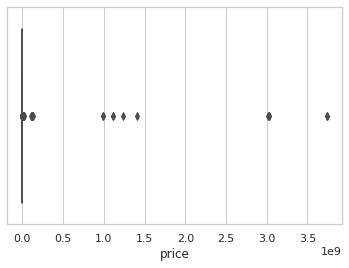

In [52]:
#price
sns.set_theme(style="whitegrid")
sns.boxplot(x=vehicles_df.price)

**Remove rows with outlier prices**

In [53]:
#find outlier prices - prices that are outside 2 SDs from the min and max of the data
Q1 = vehicles_df['price'].quantile(0.25)
Q3 = vehicles_df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

outliers = vehicles_df[(vehicles_df.price < lower_bound) | (vehicles_df.price > upper_bound)]
vehicles_df = vehicles_df.drop(outliers.index)


-20135.0 54625.0


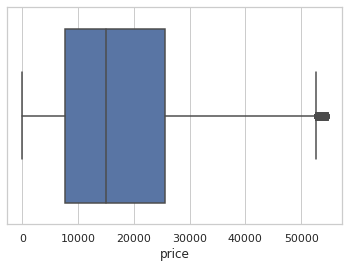

In [54]:
sns.boxplot(x = vehicles_df['price'])

**Distribution of odometer values**

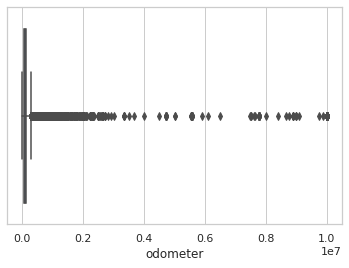

In [55]:
sns.boxplot(x=vehicles_df.odometer)

**Remove rows with outlier odometer values**

In [56]:
#find outlier odometer - odometer that are outside 2 SDs from the min and max of the data
Q1 = vehicles_df['odometer'].quantile(0.25)
Q3 = vehicles_df['odometer'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

outliers = vehicles_df[(vehicles_df.odometer < lower_bound) | (vehicles_df.odometer > upper_bound)]
vehicles_df = vehicles_df.drop(outliers.index)


-99508.125 274182.875


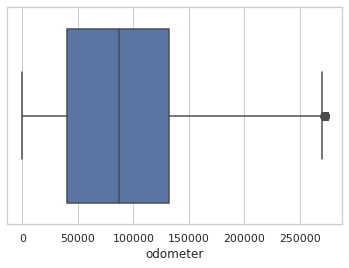

In [57]:
sns.boxplot(x=vehicles_df.odometer)

**Distribution of year variable**

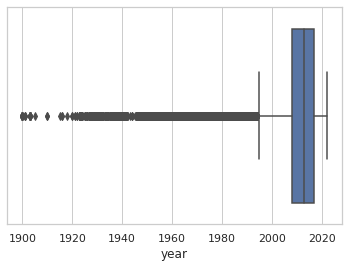

In [58]:
sns.boxplot(x=vehicles_df.year)
#Majority of the years are within 2000-2020

The values of the year variable are valid



---
###Use the label encoder to encode all the categorical variables such as condition, color, etc


In [60]:
vehicles_df['size'].value_counts()

full-size      337020
mid-size        33979
compact         18906
sub-compact      3135
Name: size, dtype: int64

In [61]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412366 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        412366 non-null  object 
 1   price         412366 non-null  float64
 2   year          411455 non-null  float64
 3   manufacturer  396715 non-null  object 
 4   model         407727 non-null  object 
 5   condition     411465 non-null  object 
 6   cylinders     412366 non-null  object 
 7   fuel          412366 non-null  object 
 8   odometer      412366 non-null  float64
 9   title_status  404450 non-null  object 
 10  transmission  409989 non-null  object 
 11  drive         412366 non-null  object 
 12  size          393040 non-null  object 
 13  type          412366 non-null  object 
 14  paint_color   412366 non-null  object 
 15  state         412366 non-null  object 
dtypes: float64(3), object(13)
memory usage: 53.5+ MB


In [66]:
vehicles_df = vehicles_df.dropna()

In [67]:
print('final shape: ', vehicles_df.shape)

final shape:  (366901, 16)


**final shape:  (366901, 16)**

In [72]:
le = LabelEncoder()
vehicles_df[['region','manufacturer','model','cylinders','fuel',
        'title_status','transmission','drive','paint_color',
        'state','condition', 'size', 'type']] = vehicles_df[['region','manufacturer','model',
        'cylinders','fuel','title_status','transmission','drive',
        'paint_color','state','condition', 'size', 'type']].apply(le.fit_transform)

In [73]:
vehicles_df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,16,33590.0,2014.0,14,16289,2,5,17,57923.0,0,2,0,1,477,12693,1
28,16,22590.0,2010.0,7,16608,2,5,17,71229.0,0,2,0,1,477,1749,1
29,16,39590.0,2020.0,7,16652,2,5,17,19160.0,0,2,0,1,477,6348,1
30,16,30990.0,2017.0,38,19258,2,5,17,41124.0,0,2,1,1,477,6348,1
31,16,15000.0,2013.0,13,8260,0,4,17,128000.0,0,0,67,1,1467,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590.0,2019.0,30,12507,2,4,17,32226.0,0,2,43,1,739,3948,50
426876,397,30590.0,2020.0,40,15703,2,6,17,12029.0,0,2,43,1,739,6348,50
426877,397,34990.0,2020.0,6,20479,2,6,1,4174.0,0,2,0,1,373,12693,50
426878,397,28990.0,2018.0,23,7379,2,4,17,30112.0,0,2,43,1,739,10988,50


In [74]:
#coverting vehicles_df to a csv file to use for modelling
vehicles_df.to_csv('new_vehicle.csv')

In [75]:
#copy the new dataset into the same location as the Kaggle dataset location in drive
!cp '/content/new_vehicle.csv' "/content/gdrive/My Drive/Kaggle"

cp: cannot stat '/content/new_vehicle.csv': No such file or directory


## DATA ANALYSIS